# **Dataset Preparation**

In [1]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster.silhouette import silhouette_visualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from yellowbrick.datasets import load_nfl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.offline as pyoff
import plotly.graph_objs as go
import datetime as dt
import feature_engine
from feature_engine.outliers import Winsorizer
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\a\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\a\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\a\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
path = 'D:/PTDLCB/RFMDataset.xlsx'
df = pd.read_excel(path)
df

,CustomerID,SalesOrderID,Quantity,ProductID,UnitPrice,OrderDate,TerritoryID,Region,CountryRegionCode,Continents
0,29825,43659,1,776,2024.994,2011-05-31,5,Southeast,US,North America
1,29825,43659,3,777,2024.994,2011-05-31,5,Southeast,US,North America
2,29825,43659,1,778,2024.994,2011-05-31,5,Southeast,US,North America
3,29825,43659,1,771,2039.994,2011-05-31,5,Southeast,US,North America
4,29825,43659,1,772,2039.994,2011-05-31,5,Southeast,US,North America
...,...,...,...,...,...,...,...,...,...,...
121312,15868,75122,1,878,21.980,2014-06-30,6,Canada,CA,North America
121313,15868,75122,1,712,8.990,2014-06-30,6,Canada,CA,North America
121314,18759,75123,1,878,21.980,2014-06-30,6,Canada,CA,North America
121315,18759,75123,1,879,159.000,2014-06-30,6,Canada,CA,North America


In [3]:
df.isnull()

,CustomerID,SalesOrderID,Quantity,ProductID,UnitPrice,OrderDate,TerritoryID,Region,CountryRegionCode,Continents
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
121312,False,False,False,False,False,False,False,False,False,False
121313,False,False,False,False,False,False,False,False,False,False
121314,False,False,False,False,False,False,False,False,False,False
121315,False,False,False,False,False,False,False,False,False,False


In [4]:
df.count()

CustomerID           121317
SalesOrderID         121317
Quantity             121317
ProductID            121317
UnitPrice            121317
OrderDate            121317
TerritoryID          121317
Region               121317
CountryRegionCode    121317
Continents           121317
dtype: int64

In [5]:
# Remove NaN value
df_not_nan = df[df['CustomerID'].notna()]
df_not_nan = df_not_nan.sample(121317, random_state = 42)
df_not_nan.head(10)

,CustomerID,SalesOrderID,Quantity,ProductID,UnitPrice,OrderDate,TerritoryID,Region,CountryRegionCode,Continents
40841,29618,51771,3,858,14.6940,2013-06-30,10,United Kingdom,GB,Europe
35593,29825,51081,4,870,2.9940,2013-05-30,5,Southeast,US,North America
21757,29880,48062,2,781,1242.8518,2012-09-30,5,Southeast,US,North America
70745,11838,59183,1,873,2.2900,2013-10-31,1,Northwest,US,North America
76605,29941,61229,11,859,14.2042,2013-11-30,10,United Kingdom,GB,Europe
8682,29582,46053,1,742,722.5949,2012-03-30,1,Northwest,US,North America
63425,23282,57262,1,873,2.2900,2013-10-01,1,Northwest,US,North America
104415,29523,69528,4,883,32.3940,2014-03-31,4,Southwest,US,North America
1517,29969,44083,1,770,419.4589,2011-08-01,6,Canada,CA,North America
120231,26781,74659,1,713,49.9900,2014-06-16,1,Northwest,US,North America


In [6]:
df.isnull().mean()

CustomerID           0.0
SalesOrderID         0.0
Quantity             0.0
ProductID            0.0
UnitPrice            0.0
OrderDate            0.0
TerritoryID          0.0
Region               0.0
CountryRegionCode    0.0
Continents           0.0
dtype: float64

# **Data Understanding**

In [7]:
#Ranking of the most ordered products
df.groupby("ProductID").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
ProductID,
712,8311
870,6815
711,6743
715,6592
708,6532


In [8]:
#How many invoices are there in the data set
df["SalesOrderID"].nunique()

31465

In [9]:
#Which are the most expensive products?
df.sort_values("UnitPrice", ascending = False).head()

,CustomerID,SalesOrderID,Quantity,ProductID,UnitPrice,OrderDate,TerritoryID,Region,CountryRegionCode,Continents
9443,12105,46133,1,751,3578.27,2012-04-02,4,Southwest,US,North America
3953,13782,44580,1,753,3578.27,2011-10-03,8,Germany,DE,Europe
1296,13548,43931,1,752,3578.27,2011-07-04,8,Germany,DE,Europe
1295,28038,43930,1,751,3578.27,2011-07-04,4,Southwest,US,North America
1293,16740,43928,1,752,3578.27,2011-07-03,9,Australia,AU,Pacific


In [10]:
#Top 5 regions with the highest number of orders
df["Region"].value_counts().head()

Southwest         25644
Canada            19064
Northwest         16865
Australia         15058
United Kingdom    10426
Name: Region, dtype: int64

In [11]:
# Calculate RFM

# Calculate R - Recency
# Convert string -> date
df_not_nan['OrderDate'] =  pd.to_datetime(df_not_nan['OrderDate'], format='%Y-%m-%d %H:%M:%S')

# Get the biggest date in OrderDate + 1
import datetime
current_date = max(df_not_nan['OrderDate']) + datetime.timedelta(days=1)

# Calculate M - MoneytaryValue: Amount was added as a column
df_not_nan['Amount'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']

#Create RFM Modelling scores for each customer
# Group by CustomerID to calculate R, F, M
RFMScores = df_not_nan.groupby('CustomerID').agg(
    {'OrderDate': lambda x: (current_date - x.max()).days, 
     'SalesOrderID': lambda x: len(x), 
     'Amount': lambda x: x.sum()}
)

#Convert Order Date into type int
RFMScores['OrderDate'] = RFMScores['OrderDate'].astype(int)



In [12]:
RFMScores.head()

,OrderDate,SalesOrderID,Amount
CustomerID,,,
11000,271,8,8248.99
11001,50,11,6383.88
11002,340,4,8114.04
11003,264,9,8139.29
11004,273,6,8196.01


In [14]:
df.shape #size information

(121317, 10)

In [15]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T
#Explanatory statistics values of the observation units corresponding to the specified percentages
#Processing according to numerical variables

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
CustomerID,121317.0,24345.630505,6689.110387,11000.0000,11185.00,11931.80,13265.60,18177.00,29485.00,29795.000,29994.00,30067.00,30112.00,30118.00
SalesOrderID,121317.0,57827.363782,9009.147902,43659.0000,43911.00,45301.00,46668.00,49884.00,57029.00,65490.000,71215.00,72617.20,74601.00,75123.00
Quantity,121317.0,2.266080,2.491323,1.0000,1.00,1.00,1.00,1.00,1.00,3.000,5.00,7.00,12.00,44.00
ProductID,121317.0,841.680836,86.452124,707.0000,707.00,708.00,712.00,768.00,863.00,921.000,959.00,977.00,998.00,999.00
UnitPrice,121317.0,465.093496,751.885081,1.3282,2.29,3.99,4.99,21.49,49.99,602.346,1466.01,2294.99,3578.27,3578.27
TerritoryID,121317.0,5.411402,2.835734,1.0000,1.00,1.00,1.00,4.00,6.00,8.000,9.00,10.00,10.00,10.00


# **Finding RFM Score**

In [16]:
df.head()

,CustomerID,SalesOrderID,Quantity,ProductID,UnitPrice,OrderDate,TerritoryID,Region,CountryRegionCode,Continents
0,29825,43659,1,776,2024.994,2011-05-31,5,Southeast,US,North America
1,29825,43659,3,777,2024.994,2011-05-31,5,Southeast,US,North America
2,29825,43659,1,778,2024.994,2011-05-31,5,Southeast,US,North America
3,29825,43659,1,771,2039.994,2011-05-31,5,Southeast,US,North America
4,29825,43659,1,772,2039.994,2011-05-31,5,Southeast,US,North America


In [17]:
df.info() 
#dataframe's index dtype and column dtypes, non-null values and memory usage information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         121317 non-null  int64         
 1   SalesOrderID       121317 non-null  int64         
 2   Quantity           121317 non-null  int64         
 3   ProductID          121317 non-null  int64         
 4   UnitPrice          121317 non-null  float64       
 5   OrderDate          121317 non-null  datetime64[ns]
 6   TerritoryID        121317 non-null  int64         
 7   Region             121317 non-null  object        
 8   CountryRegionCode  121317 non-null  object        
 9   Continents         121317 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 9.3+ MB


In [18]:
#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'OrderDate':'Recency','SalesOrderID':'Frequency','Amount':'MonetaryValue'}, inplace=True)
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,MonetaryValue
0,11000,271,8,8248.99
1,11001,50,11,6383.88
2,11002,340,4,8114.04
3,11003,264,9,8139.29
4,11004,273,6,8196.01


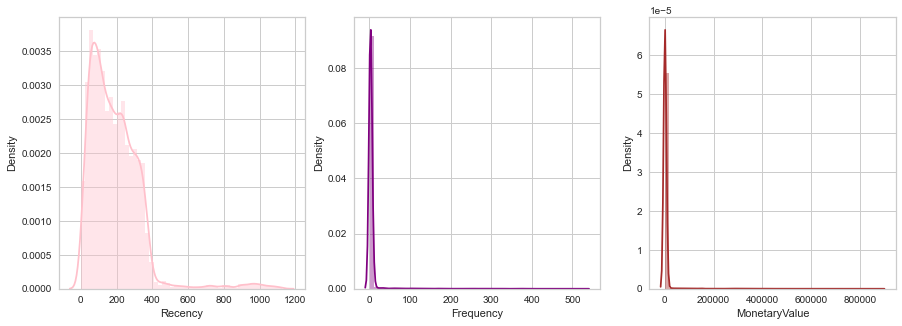

In [19]:
# Draw distribution to check

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(RFMScores['Recency'], ax = ax[0], color = 'pink')
sns.distplot(RFMScores['Frequency'], ax = ax[1], color = 'purple')
sns.distplot(RFMScores['MonetaryValue'], ax = ax[2], color = 'brown')
plt.show()

In [20]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    19119.000000
mean       191.267483
std        150.423605
min          1.000000
25%         86.000000
50%        166.000000
75%        264.000000
max       1127.000000
Name: Recency, dtype: float64

In [21]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    19119.000000
mean         6.345363
std         26.478444
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max        530.000000
Name: Frequency, dtype: float64

In [22]:
#Descriptive Statistics (MonetaryValue)
RFMScores.MonetaryValue.describe()

count     19119.000000
mean       5772.994891
std       39030.612897
min           1.374000
25%          54.980000
50%         548.980000
75%        2822.386050
max      882276.496600
Name: MonetaryValue, dtype: float64

In [23]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(RFMScores[x], ax=ax[0,0])
    sns.distplot(np.log(RFMScores[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(RFMScores[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(RFMScores[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(RFMScores[x].skew().round(2))
    print(np.log(RFMScores[x]).skew().round(2))
    print(np.sqrt(RFMScores[x]).skew().round(2))
    print(pd.Series(stats.boxcox(RFMScores[x])[0]).skew().round(2))

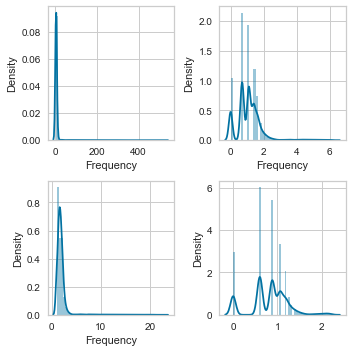

11.04
2.16
7.25
-0.1


In [24]:
analyze_skewness('Frequency')

In [25]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 86.0, 0.5: 166.0, 0.75: 264.0},
 'Frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0},
 'MonetaryValue': {0.25: 54.980000000000004, 0.5: 548.98, 0.75: 2822.38605}}

In [26]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [27]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['MonetaryValue'].apply(FnMScoring, args=('MonetaryValue',quantiles,))
RFMScores.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
11000,271,8,8248.99,4,1,1
11001,50,11,6383.88,1,1,1
11002,340,4,8114.04,4,2,1
11003,264,9,8139.29,3,1,1
11004,273,6,8196.01,4,1,1


In [28]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
11000,271,8,8248.99,4,1,1,411,6
11001,50,11,6383.88,1,1,1,111,3
11002,340,4,8114.04,4,2,1,421,7
11003,264,9,8139.29,3,1,1,311,5
11004,273,6,8196.01,4,1,1,411,6


In [29]:
#Transposition of the RFM table. This makes it easier to evaluate.
RFMScores.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,19119.0,191.267483,150.423605,1.000,86.00,166.00,264.00000,1127.0000
Frequency,19119.0,6.345363,26.478444,1.000,2.00,3.00,4.00000,530.0000
MonetaryValue,19119.0,5772.994891,39030.612897,1.374,54.98,548.98,2822.38605,882276.4966
R,19119.0,2.497568,1.118271,1.000,1.00,2.00,3.00000,4.0000
F,19119.0,2.834092,1.163659,1.000,2.00,3.00,4.00000,4.0000
M,19119.0,2.502851,1.119719,1.000,1.50,3.00,4.00000,4.0000
RFMScore,19119.0,7.834510,2.356282,3.000,6.00,8.00,10.00000,12.0000


In [30]:
#Customers with RFM Score 413
RFMScores[RFMScores["RFMGroup"] == "413"].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
11014,274,6,138.45,4,1,3,413,8
11059,319,7,116.93,4,1,3,413,8
11081,291,5,104.26,4,1,3,413,8
11113,283,7,109.88,4,1,3,413,8
11153,306,5,109.77,4,1,3,413,8


In [31]:
# Segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [32]:
#Creation of segment variable
RFMScores['Segment'] = RFMScores['R'].astype(str) + RFMScores['F'].astype(str)
RFMScores['Segment'] = RFMScores['Segment'].replace(seg_map, regex=True)

In [33]:
RFMScores.head(15)

,Recency,Frequency,MonetaryValue,R,F,M,RFMGroup,RFMScore,Segment
CustomerID,,,,,,,,,
11000,271,8,8248.99,4,1,1,411,6,Promising
11001,50,11,6383.88,1,1,1,111,3,Hibernating
11002,340,4,8114.04,4,2,1,421,7,Potential Loyalists
11003,264,9,8139.29,3,1,1,311,5,About to Sleep
11004,273,6,8196.01,4,1,1,411,6,Promising
11005,272,6,8121.33,4,1,1,411,6,Promising
11006,260,5,8119.03,3,1,1,311,5,About to Sleep
11007,316,8,8211.00,4,1,1,411,6,Promising
11008,333,7,8106.31,4,1,1,411,6,Promising


In [36]:
dups_seg = RFMScores.pivot_table(columns=['Segment'], aggfunc='size')
print(dups_seg)

Segment
About to Sleep         1632
At Risk                5586
Hibernating            4010
Loyal Customers        4342
Need Attention         1237
Potential Loyalists    1754
Promising               558
dtype: int64


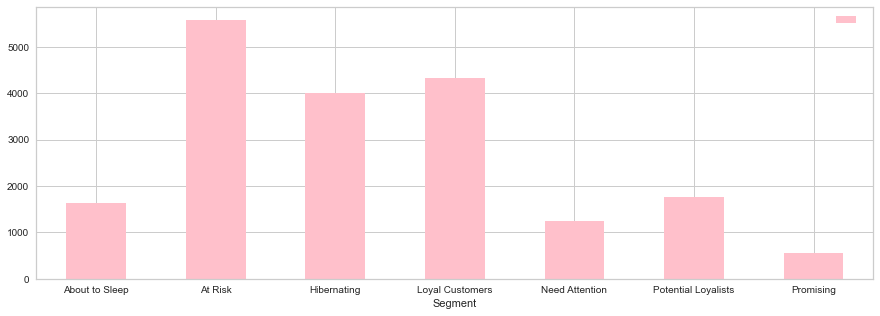

In [37]:
df_reg = pd.DataFrame({'Segment':['About to Sleep', 'At Risk', 'Hibernating', 'Loyal Customers', 'Need Attention', 'Potential Loyalists', 'Promising'], '':
                   [1632, 5586, 4010, 4342, 1237, 1754, 558]})
ax = df_reg.plot.bar(x='Segment', y='', color = 'pink', figsize = (15,5), rot=0)

In [34]:
#Validate the data for RFMGroup = 411
RFMScores[RFMScores['RFMGroup']=='411'].sort_values('MonetaryValue', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMGroup,RFMScore,Segment
0,29562,427,207,603126.2003,4,1,1,411,6,Promising
1,30074,458,282,458655.0651,4,1,1,411,6,Promising
2,29507,458,263,446508.8930,4,1,1,411,6,Promising
3,29624,823,81,433875.4366,4,1,1,411,6,Promising
4,29703,458,328,414077.0664,4,1,1,411,6,Promising
5,29861,823,85,409060.6015,4,1,1,411,6,Promising
6,29885,458,228,387188.8199,4,1,1,411,6,Promising
7,29594,488,194,357939.7893,4,1,1,411,6,Promising
8,29998,427,219,356801.8739,4,1,1,411,6,Promising
9,29853,458,269,311446.4310,4,1,1,411,6,Promising


In [47]:
dups_sco = RFMScores.pivot_table(columns=['RFMScore'], aggfunc='size')
print(dups_sco)

RFMScore
3      657
4     1129
5     1826
6     2248
7     2479
8     2546
9     3069
10    2519
11    1601
12    1045
dtype: int64


In [35]:
RFMScores[["Segment", "Recency","Frequency","MonetaryValue"]].groupby("Segment").agg(["mean","count"])

Recency        Frequency       MonetaryValue      
                           mean count       mean count          mean count
Segment                                                                   
About to Sleep       212.700368  1632   5.153799  1632   3150.252510  1632
At Risk               88.635875  5586   2.244719  5586    948.733040  5586
Hibernating           84.747631  4010  18.230923  4010  19140.613879  4010
Loyal Customers      330.075772  4342   1.631276  4342    889.194660  4342
Need Attention       215.089733  1237   3.000000  1237   1463.978043  1237
Potential Loyalists  320.651083  1754   3.364310  1754   1703.445438  1754
Promising            381.865591   558  18.935484   558  26020.654931   558

# **K-Means Clustering**

In [39]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['MonetaryValue'] = [handle_neg_n_zero(x) for x in RFMScores.MonetaryValue]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)
Log_Tfd_Data

,Recency,Frequency,MonetaryValue
CustomerID,,,
11000,5.602,2.079,9.018
11001,3.912,2.398,8.762
11002,5.829,1.386,9.001
11003,5.576,2.197,9.004
11004,5.609,1.792,9.011
...,...,...,...
30114,4.804,3.401,9.363
30115,4.522,3.045,9.096
30116,4.804,4.779,12.160


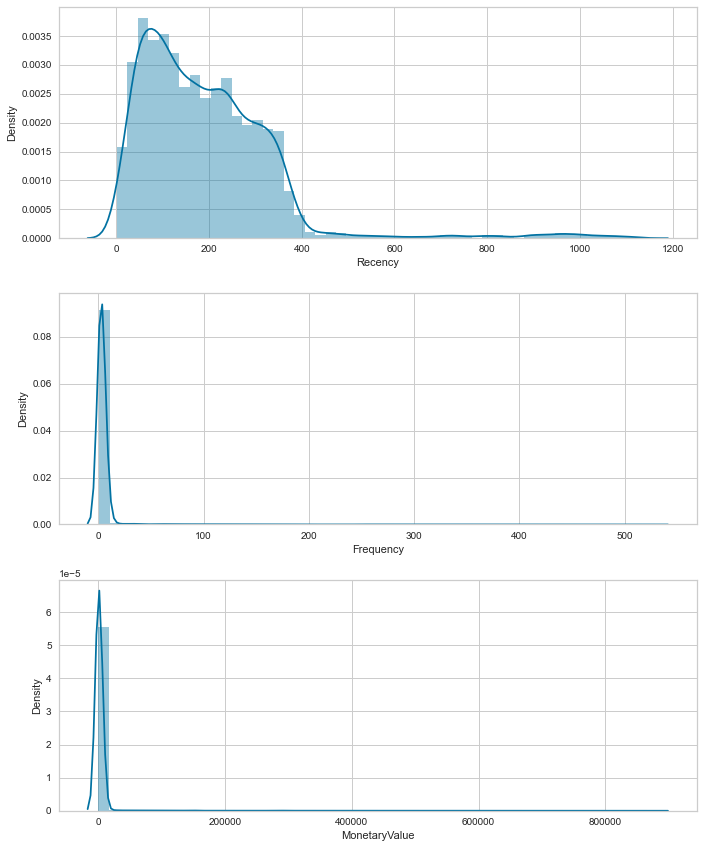

In [40]:
# Plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(RFMScores.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(RFMScores.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(RFMScores.MonetaryValue, label = 'MonetaryValue')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

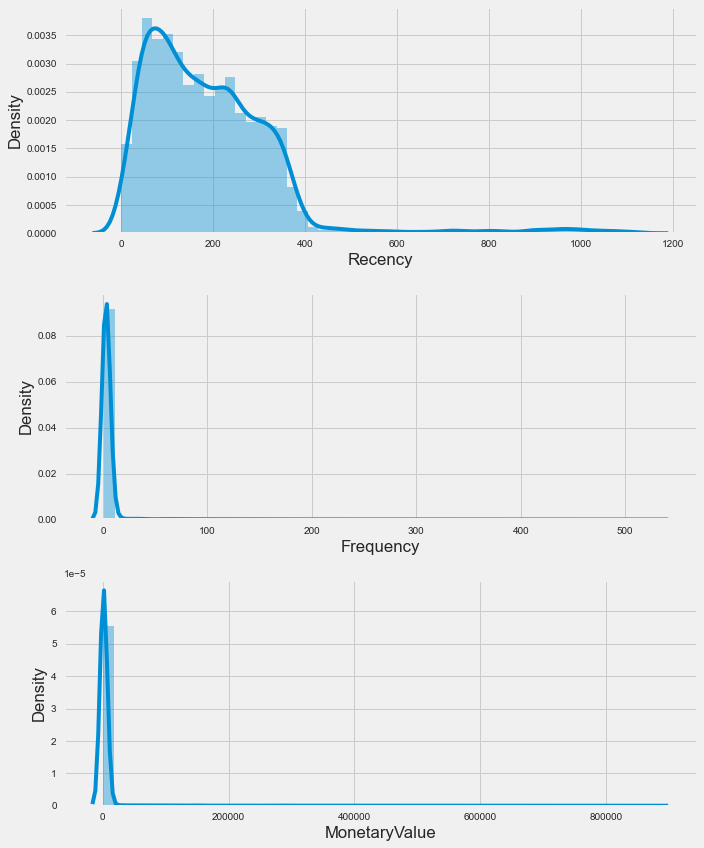

In [41]:
#Unskew the data with log transformation
RFMScores_log = RFMScores[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)
#or RFMScores_log = np.log(Log_Tfd_Data)

# Plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(RFMScores.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(RFMScores.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(RFMScores.MonetaryValue, label = 'MonetaryValue')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

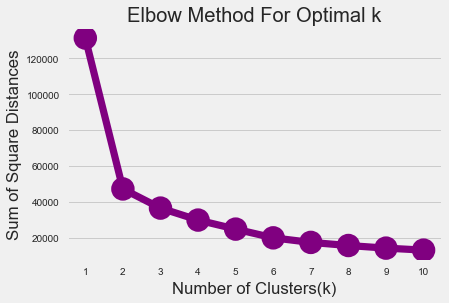

In [43]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 10)
    km = km.fit(Log_Tfd_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()), color = 'purple')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [111]:
range_n_clusters = list(range(2,11))
print ("Number of clusters from 2 to 10: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(Log_Tfd_Data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(Log_Tfd_Data, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 10: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2, silhouette score is 0.5732185028224358)
For n_clusters = 3, silhouette score is 0.5784523487698768)
For n_clusters = 4, silhouette score is 0.46162834723679547)
For n_clusters = 5, silhouette score is 0.4667588270207858)
For n_clusters = 6, silhouette score is 0.3524684402318894)
For n_clusters = 7, silhouette score is 0.34455439970124485)
For n_clusters = 8, silhouette score is 0.30881367889726263)
For n_clusters = 9, silhouette score is 0.32054319656601876)
For n_clusters = 10, silhouette score is 0.31927762380952096)


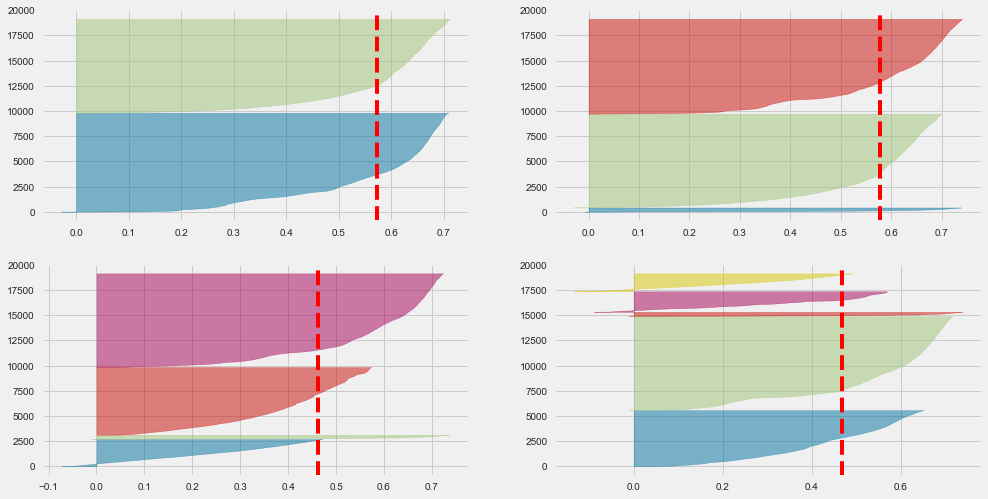

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Log_Tfd_Data)

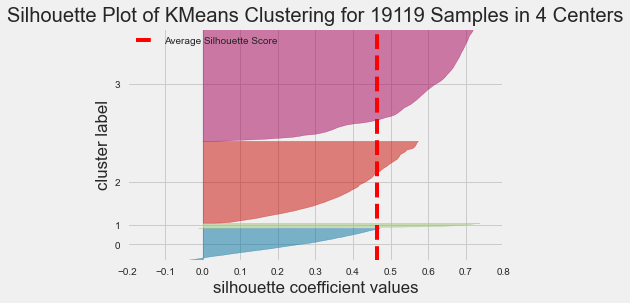

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 19119 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=1))

In [52]:
from yellowbrick.cluster.silhouette import silhouette_visualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

silhouette_visualizer(KMeans(4, random_state=1), Log_Tfd_Data, colors= 'yellowbrick')

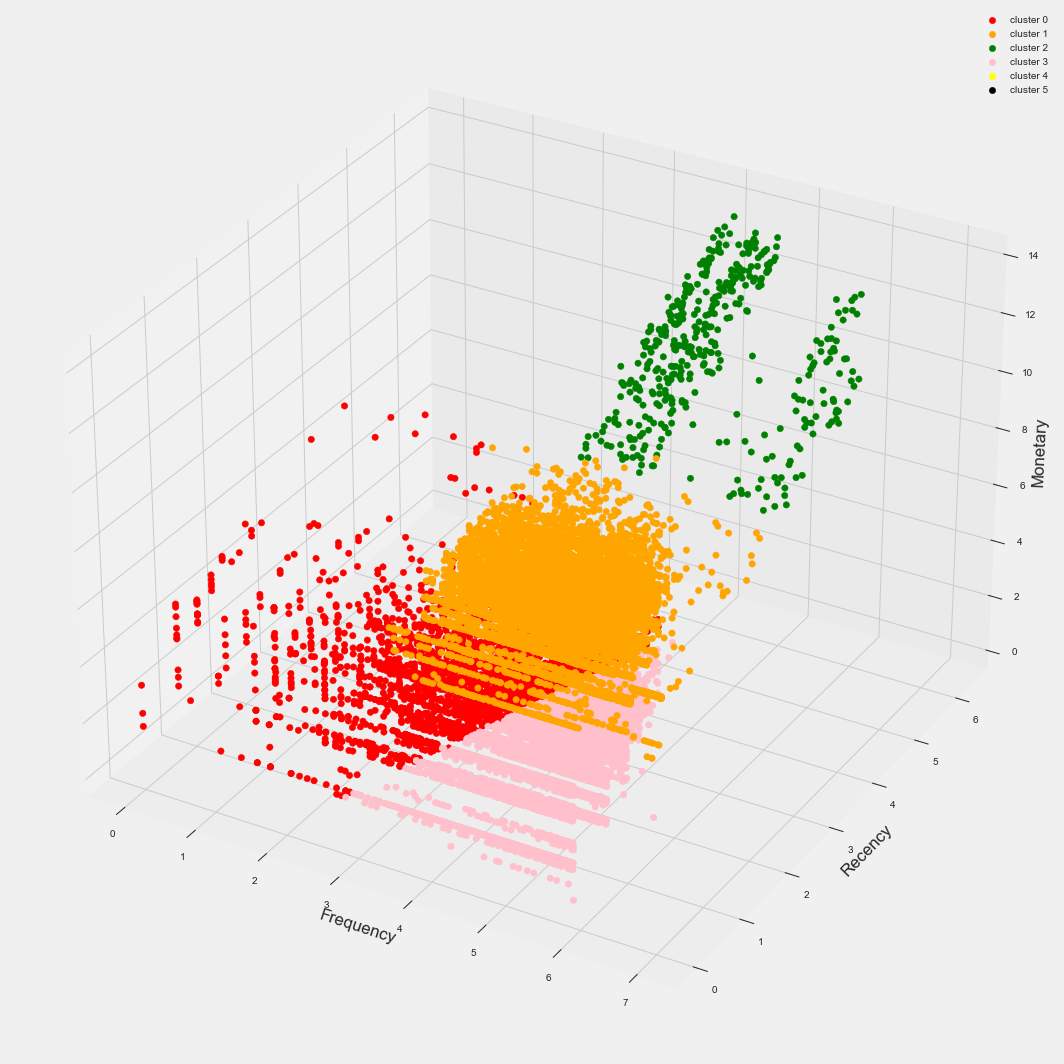

In [48]:

#k=4
model = KMeans(n_clusters = 4, max_iter = 300)
model.fit(Log_Tfd_Data)
# 3d scatterplot using matplotlib

fig = plt.figure(figsize =(18,18))
ax = fig.add_subplot(111, projection='3d')
df_z_score =np.array(Log_Tfd_Data)
ax.scatter(df_z_score[model.labels_== 0,0],df_z_score[model.labels_ == 0,1],df_z_score[model.labels_ == 0,2], s = 40, color = 'red', alpha = 1, label ="cluster 0")
ax.scatter(df_z_score[model.labels_== 1,0],df_z_score[model.labels_ == 1,1],df_z_score[model.labels_ == 1,2], s = 40, color = 'orange', alpha =1, label ="cluster 1")
ax.scatter(df_z_score[model.labels_== 2,0],df_z_score[model.labels_ == 2,1],df_z_score[model.labels_ == 2,2], s = 40, color = 'green', alpha =1, label ="cluster 2")
ax.scatter(df_z_score[model.labels_== 3,0],df_z_score[model.labels_ == 3,1],df_z_score[model.labels_ == 3,2], s = 40, color = 'pink', alpha =1, label ="cluster 3")
ax.scatter(df_z_score[model.labels_== 4,0],df_z_score[model.labels_ == 4,1],df_z_score[model.labels_ == 4,2], s = 40, color = 'yellow', alpha =1, label ="cluster 4")
ax.scatter(df_z_score[model.labels_== 5,0],df_z_score[model.labels_ == 5,1],df_z_score[model.labels_ == 5,2], s = 40, color = 'black', alpha =1, label ="cluster 5")

ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')

#ax.view_init(60, 35)
#fig
ax.legend()
plt.show()


In [44]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFMGroup,RFMScore,Segment,Cluster
CustomerID,,,,,,,,,,
11000,271,8,8248.99,4,1,1,411,6,Promising,0
11001,50,11,6383.88,1,1,1,111,3,Hibernating,3
11002,340,4,8114.04,4,2,1,421,7,Potential Loyalists,0
11003,264,9,8139.29,3,1,1,311,5,About to Sleep,0
11004,273,6,8196.01,4,1,1,411,6,Promising,0


In [45]:
dups_clu = RFMScores.pivot_table(columns=['Cluster'], aggfunc='size')
print(dups_clu)

Cluster
0    7935
1    7170
2     458
3    3556
dtype: int64


In [45]:
# Clustering
km = KMeans(n_clusters= 4, random_state= 1)
km.fit(Scaled_Data)

#Create a cluster label column in the original DataFrame
cluster_labels = km.labels_

#Calculate average RFM values and size for each cluster:
Log_Tfd_Data_k3 = Log_Tfd_Data.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
Log_Tfd_Data_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0             5.0       1.0           8.0  7925
1             5.0       1.0           4.0  7187
2             4.0       1.0           6.0  3554
3             5.0       5.0          11.0   453

In [46]:
Scaled_Data = pd.DataFrame(Scaled_Data, index=Log_Tfd_Data.index, columns=Log_Tfd_Data.columns)
Scaled_Data['K_Cluster'] = km.labels_
Scaled_Data['Segment'] = RFMScores['Segment']
Scaled_Data.reset_index(inplace = True)

#Melt the data into a long format so RFM values and metric names are stored in 1 column each
RFMScores_melt = pd.melt(Scaled_Data,id_vars=['CustomerID','Segment','K_Cluster'],value_vars=['Recency', 'Frequency', 'MonetaryValue'],
var_name='Metric',value_name='Value')
RFMScores_melt.head()

,CustomerID,Segment,K_Cluster,Metric,Value
0,11000,Promising,0,Recency,0.735138
1,11001,Hibernating,2,Recency,-1.140015
2,11002,Potential Loyalists,0,Recency,0.987008
3,11003,About to Sleep,0,Recency,0.706289
4,11004,Promising,0,Recency,0.742905


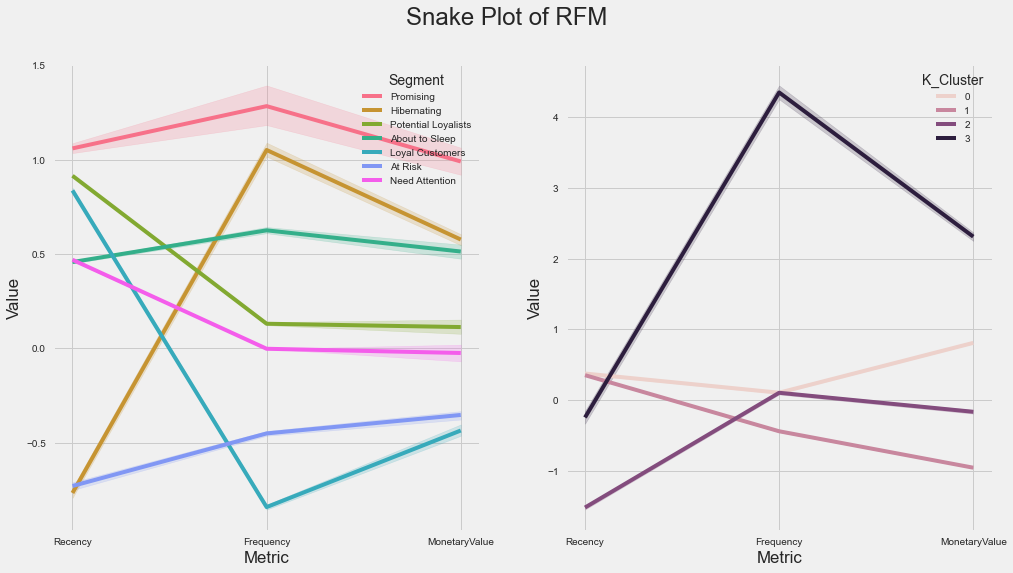

In [47]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'Segment', data = RFMScores_melt, ax=ax1)

# A snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = RFMScores_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()

In [48]:
# The further a ratio is from 0, the more important that attribute is for a segment relative to the total population
cluster_avg = Log_Tfd_Data_k3.groupby(['K_Cluster']).mean()
population_avg = Log_Tfd_Data.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
K_Cluster,,,
0,0.07,0.07,0.32
1,0.06,-0.32,-0.38
2,-0.28,0.07,-0.07
3,-0.04,3.11,0.91


In [49]:
# the mean value in total 
total_avg = RFMScores.iloc[:, 0:3].mean()
# calculate the proportional gap with total mean
cluster_avg = RFMScores.groupby('Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
prop_rfm.round(2)

,Recency,Frequency,MonetaryValue
Segment,,,
About to Sleep,0.11,-0.19,-0.45
At Risk,-0.54,-0.65,-0.84
Hibernating,-0.56,1.87,2.32
Loyal Customers,0.73,-0.74,-0.85
Need Attention,0.12,-0.53,-0.75
Potential Loyalists,0.68,-0.47,-0.70
Promising,1.00,1.98,3.51


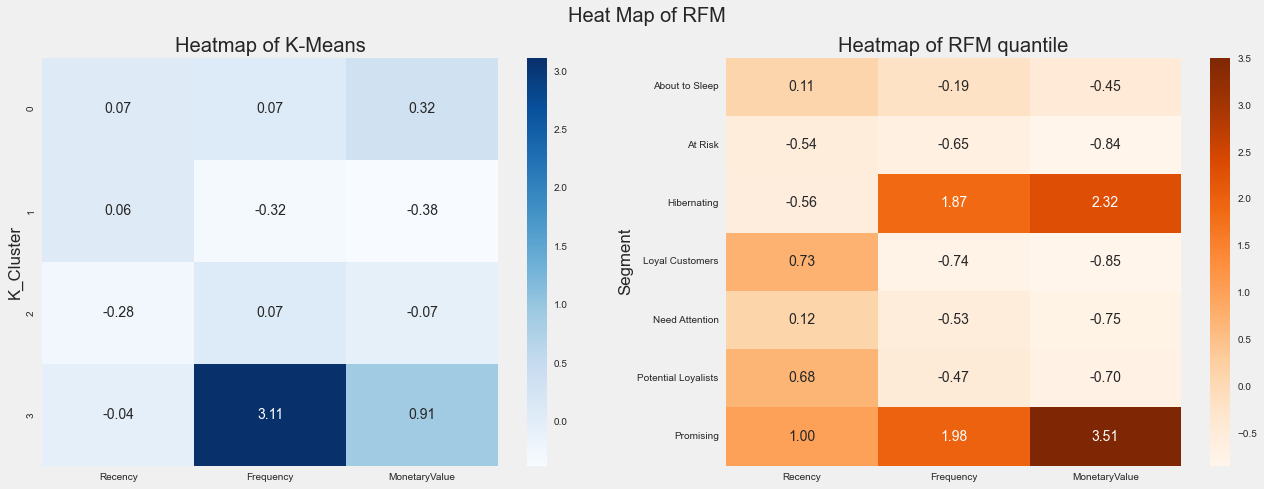

In [50]:
# Heatmap with RFM
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='Blues',ax=ax1)
ax1.set(title = "Heatmap of K-Means")

# A snake plot with K-Means
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True,ax=ax2)
ax2.set(title = "Heatmap of RFM quantile")

plt.suptitle("Heat Map of RFM",fontsize=20) #make title fontsize subtitle 

plt.show()